<a href="https://colab.research.google.com/github/anjali-ds-03/Deep-Learning/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
data= pd.read_csv("Life Expectancy Data.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
data.shape

(2938, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:

cols=data.select_dtypes(include=['float64','int64']).columns

for i in cols:
  print(i,data[i].value_counts())
  print('------------------')

Year Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
------------------
Life expectancy  Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
83.4     1
83.2     1
48.8     1
43.8     1
45.4     1
Name: count, Length: 362, dtype: int64
------------------
Adult Mortality Adult Mortality
12.0     34
14.0     30
16.0     29
138.0    25
11.0     25
         ..
717.0     1
723.0     1
715.0     1
686.0     1
665.0     1
Name: count, Length: 425, dtype: int64
------------------
infant deaths infant deaths
0      848
1      342
2      203
3      175
4       96
      ... 
89       1
91       1
100      1
106      1
110      1
Name: count, Length: 209, dtype: int64
------------------
Alcohol Alcohol
0.01    288
0.03     15
0.04     13
0.09     12
0.02     12
       ... 
7.73      1
2.57      1

In [ ]:
data['Country'].value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


In [ ]:
data['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


In [ ]:
imputer= SimpleImputer(missing_values=np.nan, strategy='median', fill_value=None)

In [ ]:
data['Life expectancy ']=imputer.fit_transform(data[['Life expectancy ']])
data['Adult Mortality']=imputer.fit_transform(data[['Adult Mortality']])
data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
data['Hepatitis B']=imputer.fit_transform(data[['Hepatitis B']])
data[' BMI ']=imputer.fit_transform(data[[' BMI ']])
data['Polio']=imputer.fit_transform(data[['Polio']])
data['Total expenditure']=imputer.fit_transform(data[['Total expenditure']])
data['Diphtheria ']=imputer.fit_transform(data[['Diphtheria ']])
data['GDP']=imputer.fit_transform(data[['GDP']])
data['Population']=imputer.fit_transform(data[['Population']])
data[' thinness  1-19 years']=imputer.fit_transform(data[[' thinness  1-19 years']])
data[' thinness 5-9 years']=imputer.fit_transform(data[[' thinness 5-9 years']])
data['Income composition of resources']=imputer.fit_transform(data[['Income composition of resources']])
data['Schooling']=imputer.fit_transform(data[['Schooling']])

In [ ]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
for column in data.columns:
  fig=px.box(data, y=column, title=f'Box Plot for {column}')

  fig.update_layout(title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5), boxmode='group')

  fig.show()

In [ ]:
#15MAY2025(ANN[regression])

In [ ]:
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]


for col_name in cols_to_handle_outliers:
  q1=data[col_name].quantile(0.25)
  q3=data[col_name].quantile(0.75)

  iqr=q3-q1

  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr

  data[col_name]=np.where((data[col_name]>upper_bound) |  (data[col_name]<lower_bound), np.mean(data[col_name]),data[col_name])

In [ ]:
#box plot

for column in data.columns:
  fig=px.box(data, y=column, title=f'Box Plot for {column}')

  fig.update_layout(title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5), boxmode='group')

  fig.show()

In [ ]:
fig=px.histogram (data, x='Year', color='Year')
fig.update_layout(title=dict(text='<b>Histogram of Year</b>', x=0.5), boxmode='group')
fig.show()

In [ ]:
fig=px.line(data.sort_values(by='Year'), y= 'Life expectancy ', animation_frame='Country', animation_group='Year', color='Country')
fig.update_layout(title=dict(text='<b>Life Expectancy trend over the years</b>', x=0.5))
fig.show()

In [ ]:
fig=px.histogram(data, x= 'Status', color='Status')
fig.update_layout(title=dict(text='<b>Histogram of Status</b>', x=0.5), boxmode='group')
fig.show()

In [ ]:
developing=data[data['Status']=='Developing']

fig=px.histogram(developing, x='Life expectancy ')
fig.update_layout(title_text='<b> Life Expectancy of Developing Countries</b>', xaxis_title='', yaxis_title='Count of ages', title_x=0.5)
fig.show()

In [ ]:
developed=data[data['Status']=='Developed']

fig=px.histogram(developed, x='Life expectancy ')
fig.update_layout(title_text='<b> Life Expectancy of Developed Countries</b>', xaxis_title='', yaxis_title='Count of ages', title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(data.groupby('Status', as_index=False).agg({'Life expectancy ':'mean'}), x='Status', y='Life expectancy ', color='Status')
fig.update_layout(title_text='<b> Average Life Expectancy by Status</b>', xaxis_title='', yaxis_title='Average Life Expectancy', title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(data.groupby('Status', as_index=False).agg({'infant deaths':'mean'}), x='Status', y= 'infant deaths', color='Status')
fig.update_layout(title_text='<b> Average infant deaths by Status', xaxis_title='', yaxis_title='Average infant deaths', title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(data.groupby('Status', as_index=False). agg({'Alcohol':'mean'}), x='Status', y= 'Alcohol', color= 'Status')
fig.update_layout(title_text='Average Alcohol Consumption by Status', xaxis_title='', yaxis_title='Average Alcohol Consumption', title_x=0.5)

fig.show()

In [ ]:
fig=px.scatter(data.sort_values(by='Year'), x='Life expectancy ',y='infant deaths', color='Country', size= 'Year' )
fig.update_layout(title_text= 'Life Expectancy vs Infant Deaths', xaxis_title='Life Expectancy', yaxis_title='Infant Deaths', title_x=0.5)
fig.show()


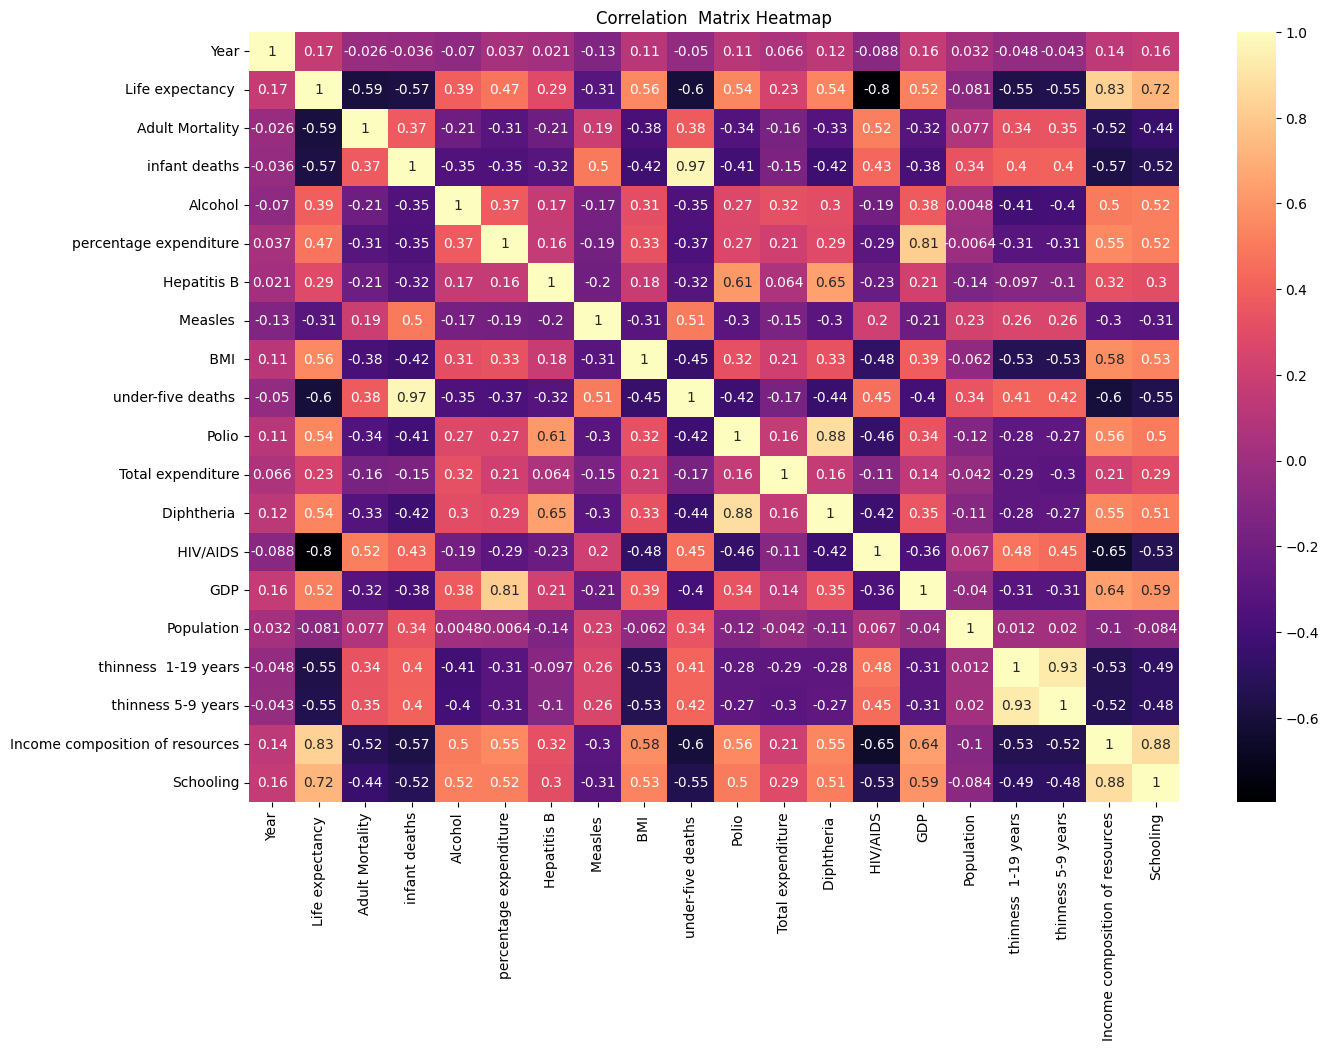

In [ ]:
numeric_columns=data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix=data[numeric_columns].corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True , cmap= 'magma')

plt.title('Correlation  Matrix Heatmap')
plt.show()

In [ ]:
cols_to_encode=['Country', 'Status']

encoder=LabelEncoder()

for col in cols_to_encode:
  data[col]=encoder.fit_transform(data[col])

In [ ]:
x=data.drop('Life expectancy ', axis=1)
y=data['Life expectancy ']

In [ ]:
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

scaler=MinMaxScaler()

x[cols_to_scale]=scaler.fit_transform(x[cols_to_scale])

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
model=Sequential([
    Dense(64, activation='relu', input_dim=21),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,793 (38.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 0 (0.00 B)

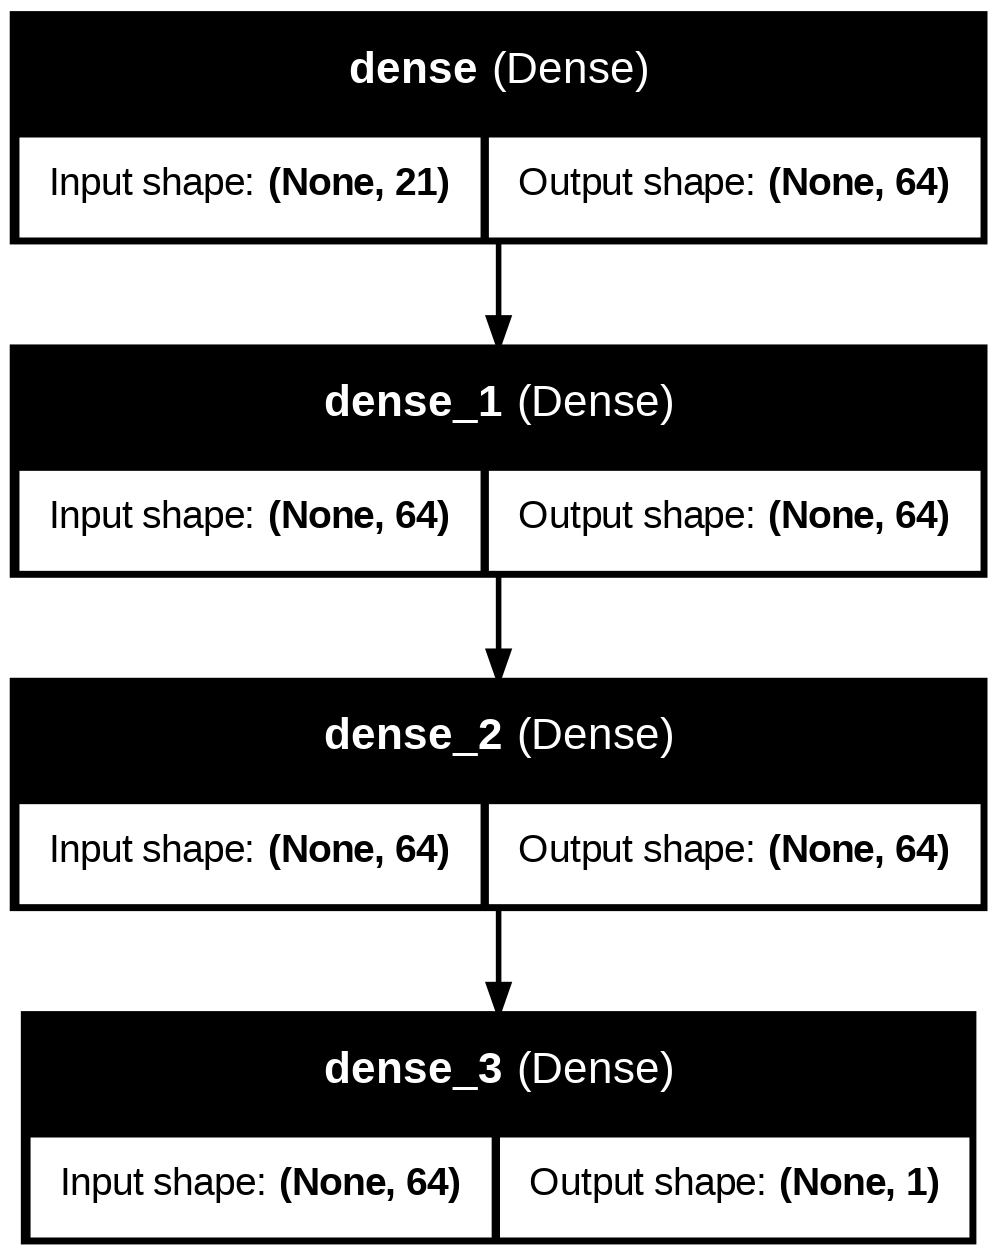

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(x_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4551.9512 - mean_absolute_error: 66.5599 - mean_squared_error: 4551.9512 - val_loss: 644.7739 - val_mean_absolute_error: 23.4332 - val_mean_squared_error: 644.7739
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 245.0792 - mean_absolute_error: 12.4876 - mean_squared_error: 245.0792 - val_loss: 104.7062 - val_mean_absolute_error: 7.9334 - val_mean_squared_error: 104.7062
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 93.2076 - mean_absolute_error: 7.5897 - mean_squared_error: 93.2076 - val_loss: 82.0920 - val_mean_absolute_error: 7.2466 - val_mean_squared_error: 82.0920
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.0826 - mean_absolute_error: 7.1233 - mean_squared_error: 80.0826 - val_loss: 71.7442 - val_mean_absolute_error: 6.7816 - val_mean_squared_error: 71.7442
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 70.3086 - mean_absolute_error: 6.6898 - mean_squared_error: 70.3086 

In [ ]:
y_pred=model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
Accuracy=r2_score(y_test, y_pred)
Accuracy

0.9175750627048765

In [ ]:
#make comparison , randomforest, decisiontree